In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dados = pd.read_csv('D:/UCPEL/IA-ML/column_3C_weka.csv')

In [4]:
dados.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [5]:
dados.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [7]:
#Verificando a existência de NaNs
dados.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

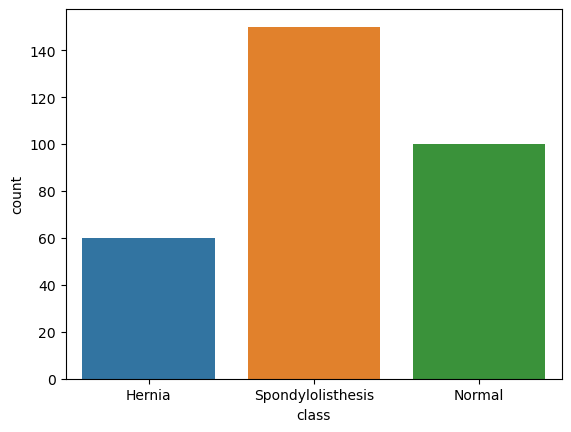

In [8]:
#Verificando a quantidade de elemenrtos de cada classe
sns.countplot(x = 'class', data = dados)

In [9]:
dados['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

In [10]:
classes = dados['class'].unique()
n_classes = len(classes)

<AxesSubplot:ylabel='Frequency'>

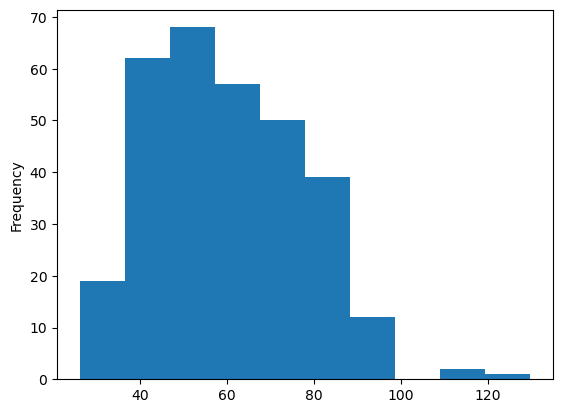

In [11]:
#Verificando a distribuição de cada variável
dados['pelvic_incidence'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

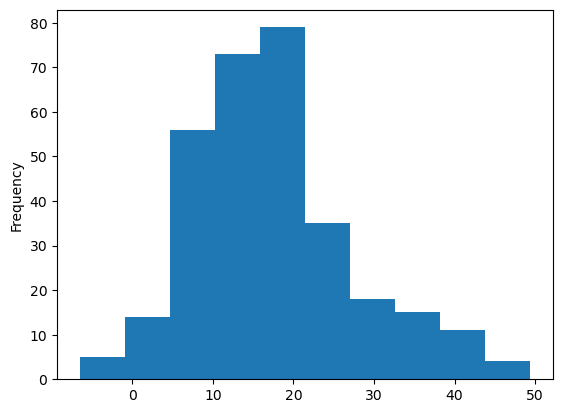

In [12]:
dados['pelvic_tilt'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

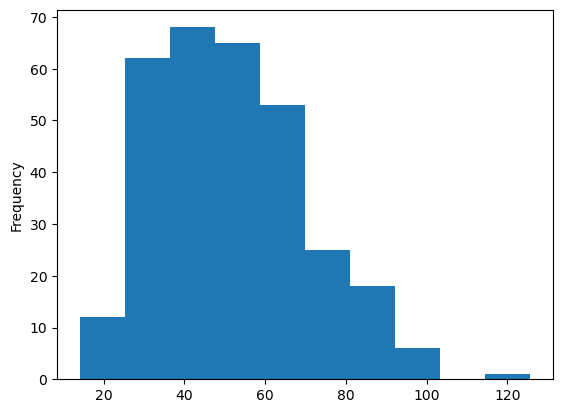

In [13]:
dados['lumbar_lordosis_angle'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

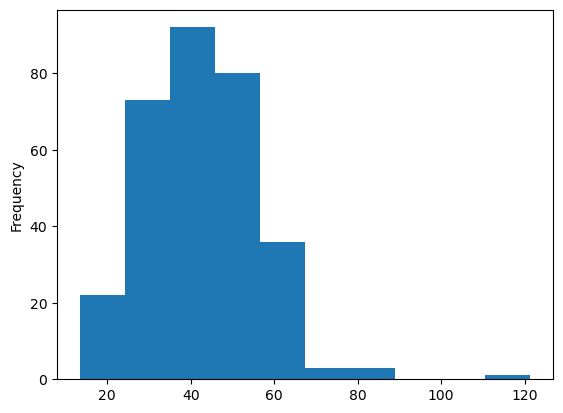

In [14]:
dados['sacral_slope'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

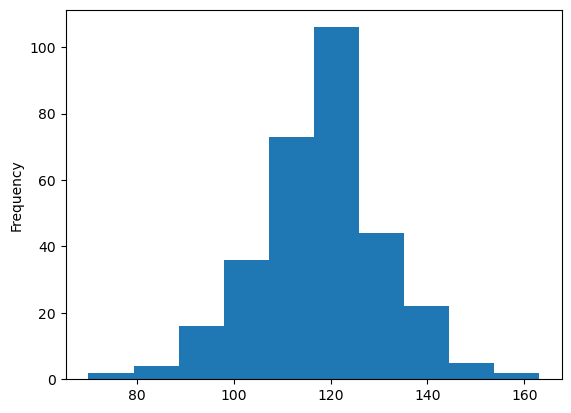

In [15]:
dados['pelvic_radius'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

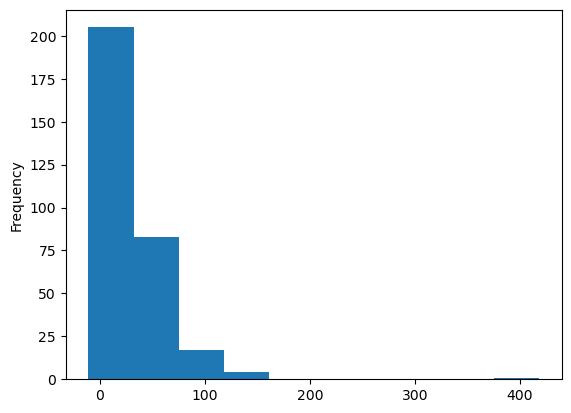

In [16]:
dados['degree_spondylolisthesis'].plot(kind = 'hist')

In [17]:
#Normalizando dados
from sklearn.preprocessing import StandardScaler

In [18]:
colunas = dados.columns.drop('class')

In [19]:
colunas

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
      dtype='object')

In [20]:
sc = StandardScaler()

In [21]:
dados[colunas] = sc.fit_transform(dados[colunas])

In [22]:
dados.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,Hernia
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,Hernia
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,Hernia
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,Hernia
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,Hernia


In [23]:
#Convertendo as classes para valores numéricos
from sklearn.preprocessing import LabelEncoder, label_binarize

In [24]:
#Separando as variáveis X e Y
X = dados.drop('class', axis = 1).values

In [25]:
Y = dados['class'].values

In [26]:
Y = label_binarize(Y, classes = classes)

In [27]:
#Separando em amostra de treino e teste
from sklearn.model_selection import train_test_split

In [28]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [31]:
#Aplicando o modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

In [32]:
modelo = RandomForestClassifier()

In [34]:
modelo.fit(X_treino,Y_treino)

RandomForestClassifier()

In [35]:
#Determinando a acurácia na amostra de treino
score_treino = modelo.score(X_treino, Y_treino)
score_treino

1.0

In [36]:
#Realizando previsão na amostra de teste
Y_previsto = modelo.predict(X_teste)

In [37]:
score_teste = modelo.score(X_teste, Y_teste)

In [38]:
score_teste

0.7948717948717948

In [40]:
#Gerando matriz de confusão
from sklearn.metrics import confusion_matrix

In [41]:
cm = confusion_matrix(Y_teste.argmax(axis = 1), Y_previsto.argmax(axis = 1))

In [42]:
cm

array([[ 6,  1,  8],
       [ 0, 38,  1],
       [ 4,  2, 18]], dtype=int64)

<AxesSubplot:>

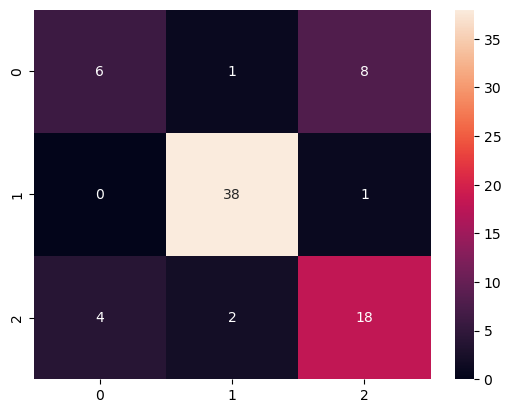

In [43]:
sns.heatmap(cm, annot=True, fmt="d")

In [55]:
#Calculando métricas
from sklearn.metrics import classification_report, f1_score, precision_score, average_precision_score, recall_score, accuracy_score

In [45]:
#Relatório de classificação
cr = classification_report(Y_teste, Y_previsto, labels = [0,1])
print(cr)

              precision    recall  f1-score   support

           0       0.60      0.40      0.48        15
           1       0.93      0.97      0.95        39

   micro avg       0.86      0.81      0.84        54
   macro avg       0.76      0.69      0.72        54
weighted avg       0.84      0.81      0.82        54
 samples avg       0.56      0.56      0.56        54



C:\Users\tfwes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tfwes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
#F1-score
f1_macro = f1_score(Y_teste, Y_previsto, average = 'macro')
print("F1 Macro score = {:0.2f}%".format(f1_macro*100))

f1_wei = f1_score(Y_teste, Y_previsto, average = 'weighted')
print("F1 Weighted score = {:0.2f}%".format(f1_wei*100))

F1 Macro score = 71.20%
F1 Weighted score = 78.45%


In [50]:
#Precision score
precisao_macro = precision_score(Y_teste, Y_previsto, average = 'macro')
print("Precision score = {:0.2f}%".format(precisao_macro*100))

precisao_wei = precision_score(Y_teste, Y_previsto, average='weighted')
print("Precision score = {:0.2f}%".format(precisao_wei*100))

Precision score = 73.12%
Precision score = 78.39%


In [53]:
#Recall score
rec_macro = recall_score(Y_teste, Y_previsto, average = 'macro')
print("Recall score Macro = {:0.2f}%".format(rec_macro*100))

rec_wei = recall_score(Y_teste, Y_previsto, average = 'weighted')
print("Recall score Weighted = {:0.2f}%".format(rec_wei*100))

Recall score Macro = 70.81%
Recall score Weighted = 79.49%


In [56]:
#Accuracy score
acc = accuracy_score(Y_teste, Y_previsto)
print("Accuracy score = {:0.2f}%".format(acc*100))

Accuracy score = 79.49%


In [57]:
#Curva ROC
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.multiclass import OneVsRestClassifier

In [58]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_teste[:, i], Y_previsto[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])*100

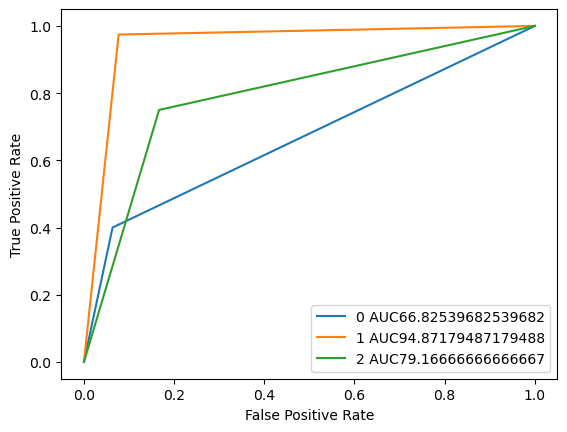

In [60]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label = str(i)+' AUC'+str(roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [61]:
#Curva Precision-Recall
from sklearn.metrics import precision_recall_curve, auc

In [62]:
lr_precision = dict()
lr_recall = dict()
lr_auc = dict()
for i in range(n_classes):
    lr_precision[i], lr_recall[i], _ = precision_recall_curve(Y_teste[:, i], Y_previsto[:, i])
    lr_auc[i] = auc(lr_recall[i], lr_precision[i])*100

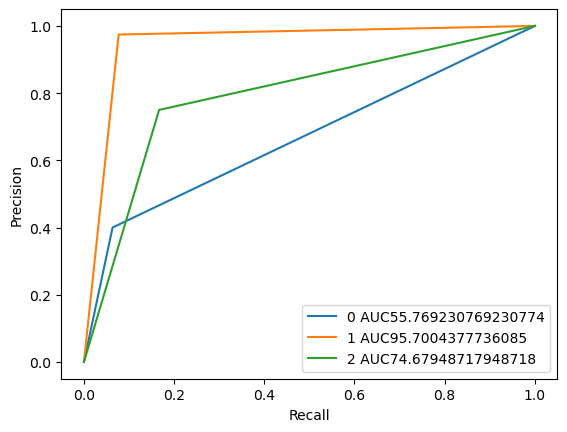

In [63]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label = str(i)+' AUC'+str(lr_auc[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [64]:
#Visualizando a árvore
from sklearn.tree import plot_tree

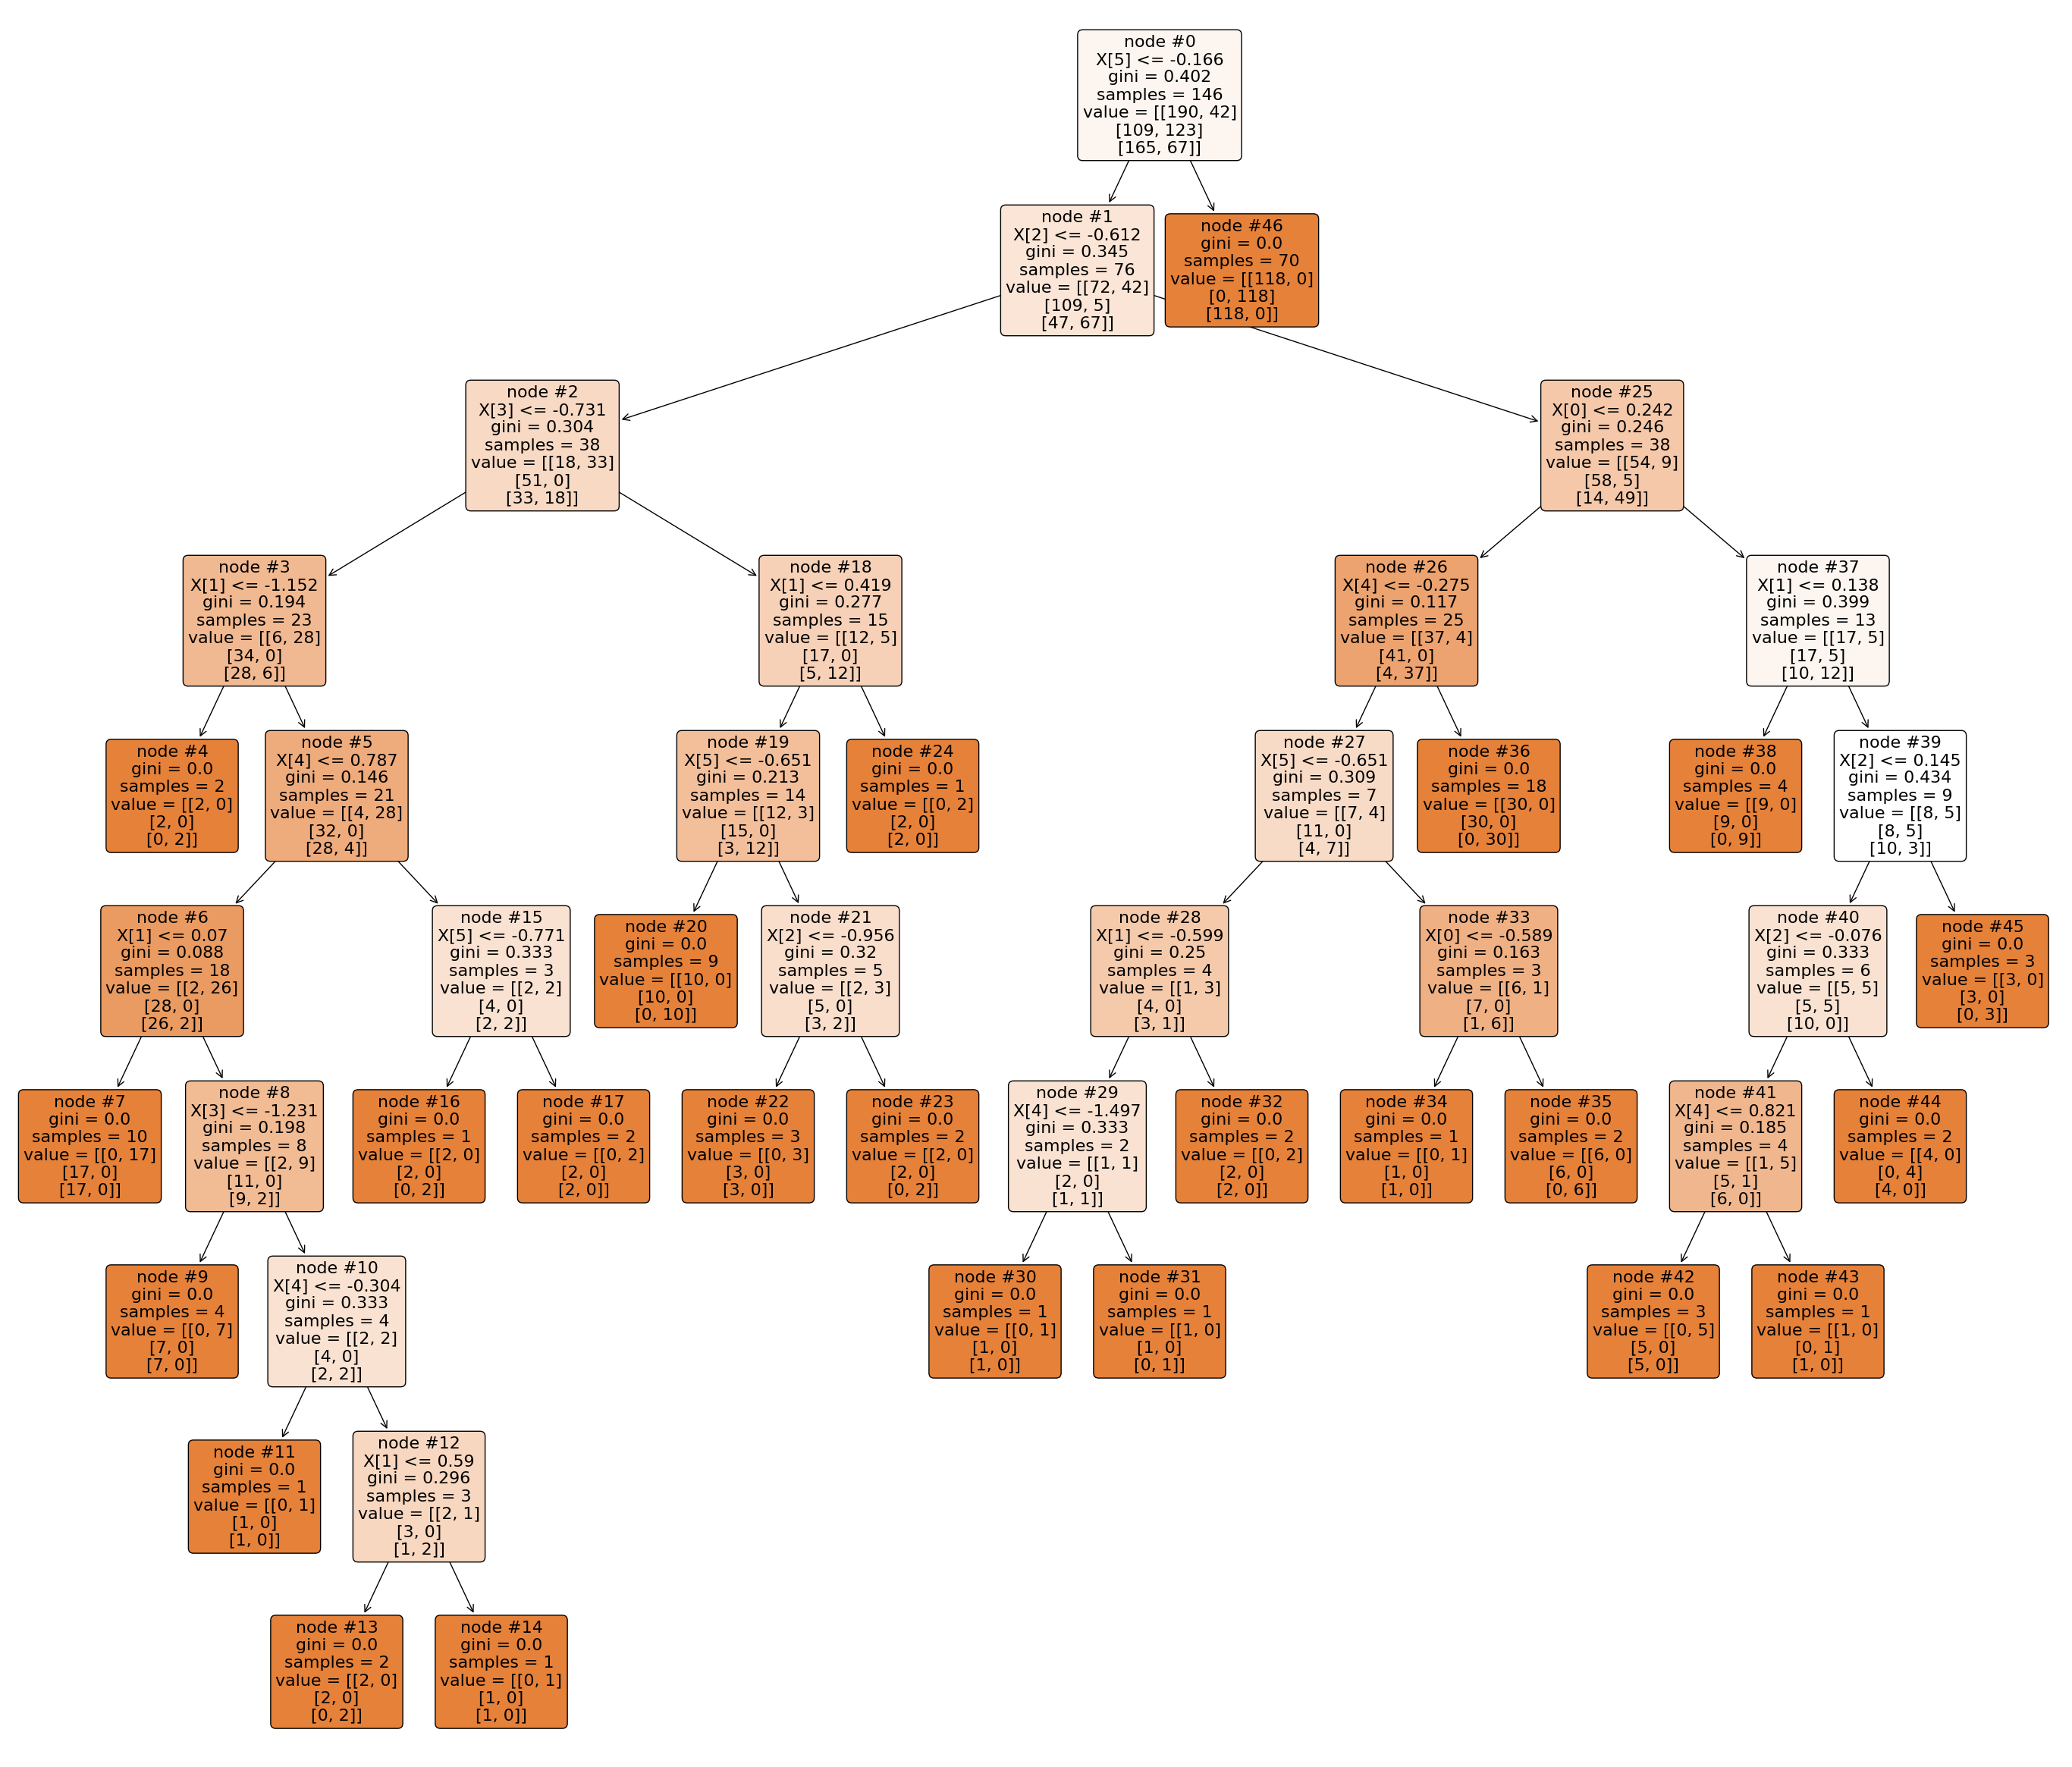

In [65]:
estimator = modelo.estimators_[5] #sexta árvore do índice
plt.figure(figsize=(35,30))
plot_tree(estimator, filled=True, node_ids=True, rounded=True);

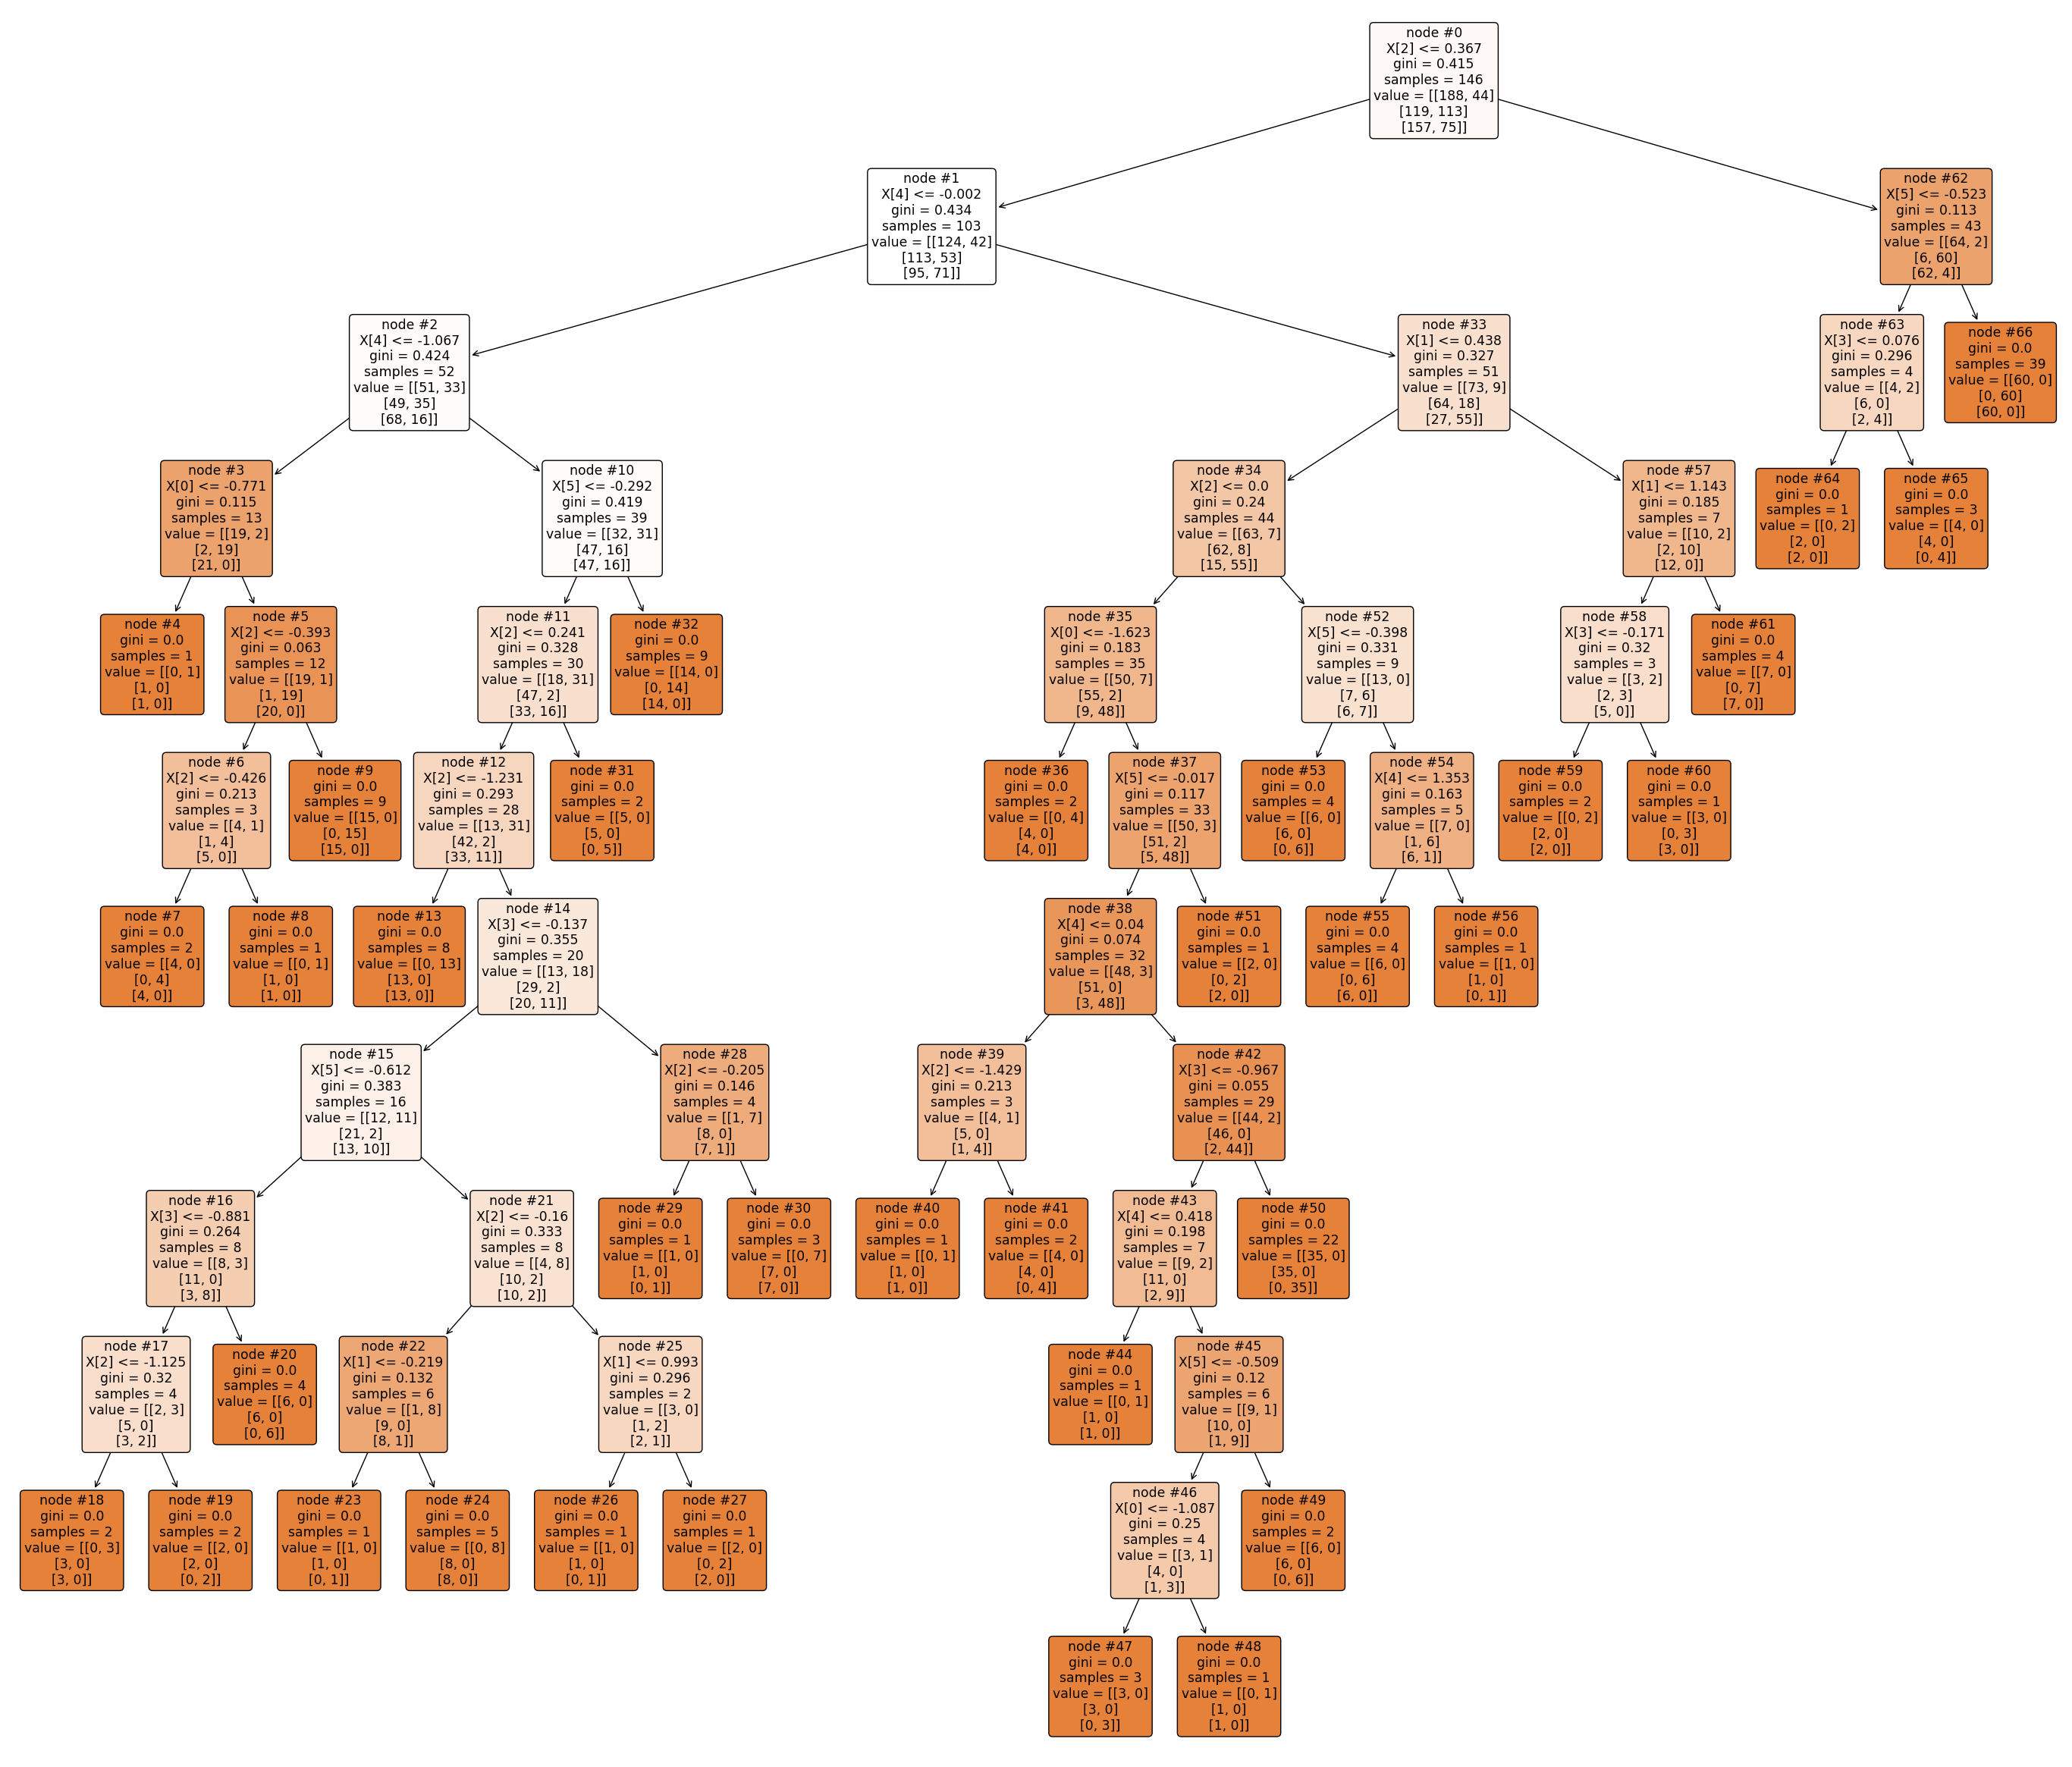

In [67]:
estimator = modelo.estimators_[3] #quarta árvore do índice
plt.figure(figsize=(35,30))
plot_tree(estimator, filled=True, node_ids=True, rounded=True);